## Overview

- Tetris game rule: https://tetris.wiki/Tetris_Guideline
- Deep Q-learning example, has code and some useful resources: https://github.com/nuno-faria/tetris-ai?tab=readme-ov-file
- Deep Q-learning example, has code: https://github.com/vietnh1009/Tetris-deep-Q-learning-pytorch
- Q-learning example, but simplified Tetris, has code and write-up: https://timhanewich.medium.com/how-i-trained-a-neural-network-to-play-tetris-using-reinforcement-learning-ecfa529c767a
- Q-learning paper, has pseudo-algo: https://openreview.net/pdf?id=8TLyqLGQ7Tg

- Deep Q Learning code mentioned in class: https://github.com/keon/deep-q-learning/blob/master/dqn.py

Roadmap:
1. ~~Develop human-playable Tetris~~
2. ~~Create an interface between the game and learning agent~~
3. ~~Try basic Tabular Q-Learning with a smaller board~~
4. Try feature-based state Tabular Q-learning
4. Deep Q-Network
5. Train the agent over many episodes
6. Evaluation, Visualization, Paper-writing




## Developing the Game

In [27]:
%load_ext autoreload
%autoreload 2

import TetrisGame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


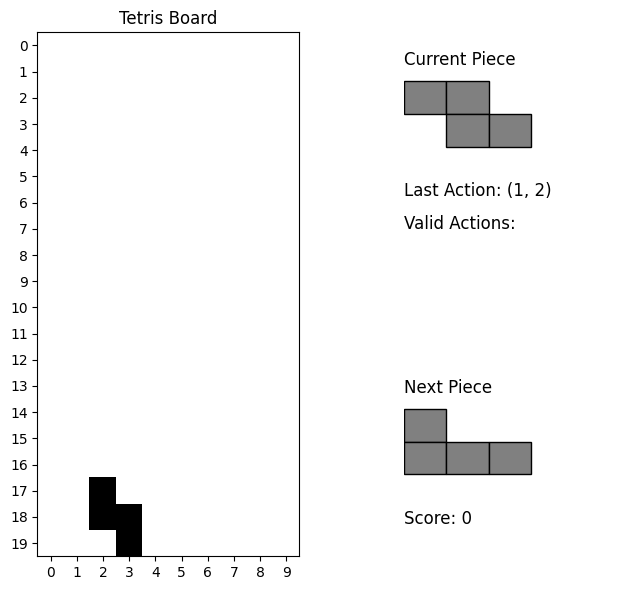

Final score: 0


In [28]:
game = TetrisGame.TetrisGame()
game.play()

In [39]:
game = TetrisGame.TetrisGame()

In [40]:
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [41]:
game.spawn_new_piece()          

In [42]:
game.current_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

In [43]:
game.next_piece

('L',
 [array([[0, 0, 1],
         [1, 1, 1]]),
  array([[1, 0],
         [1, 0],
         [1, 1]]),
  array([[1, 1, 1],
         [1, 0, 0]]),
  array([[1, 1],
         [0, 1],
         [0, 1]])])

In [45]:
valid = game.get_valid_actions()    
valid

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8)]

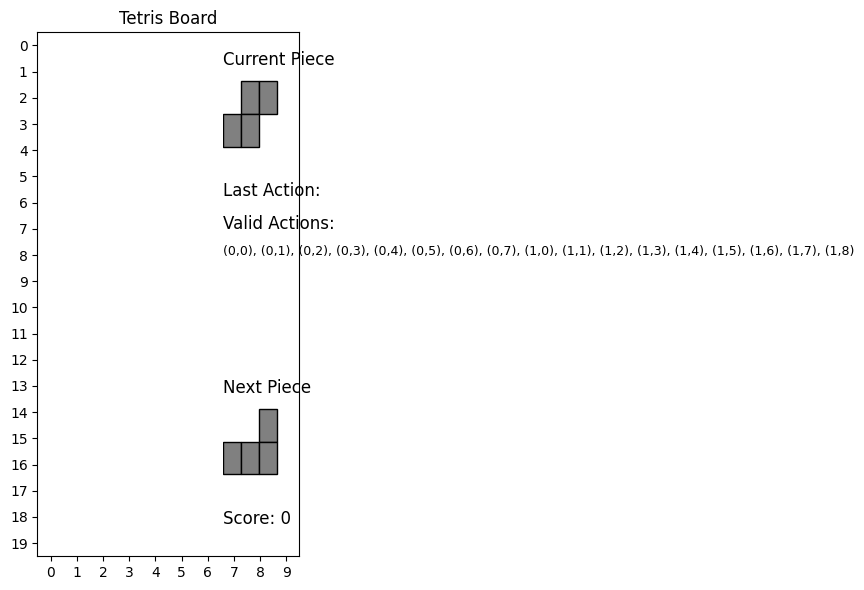

In [47]:
game.render(valid)

In [16]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
game.current_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

In [19]:
game.next_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

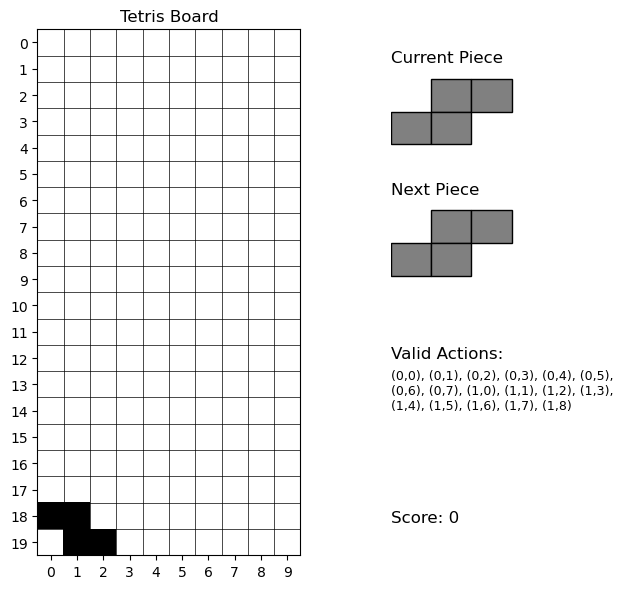

In [28]:
game.render(game.get_valid_actions())

In [29]:
game.player_input(game.get_valid_actions())

Not a valid pair; pick from the valid actions list.


(0, 0)

In [21]:
game.get_valid_actions()

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8)]

In [11]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [33]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [35]:
print(game.game_over, game.score)

True 0


## Developing the Gym

In [49]:
# pip install imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 700.7 kB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
%load_ext autoreload
%autoreload 2

import TetrisGame
import TetrisGym

import numpy as np
from collections import defaultdict
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
gym = TetrisGym.TetrisGym()

In [52]:
gym.game.current_piece

('Z',
 [array([[1, 1, 0],
         [0, 1, 1]]),
  array([[0, 1],
         [1, 1],
         [1, 0]])])

In [53]:
print(gym.state_mode)
gym.get_state()

flat


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.])

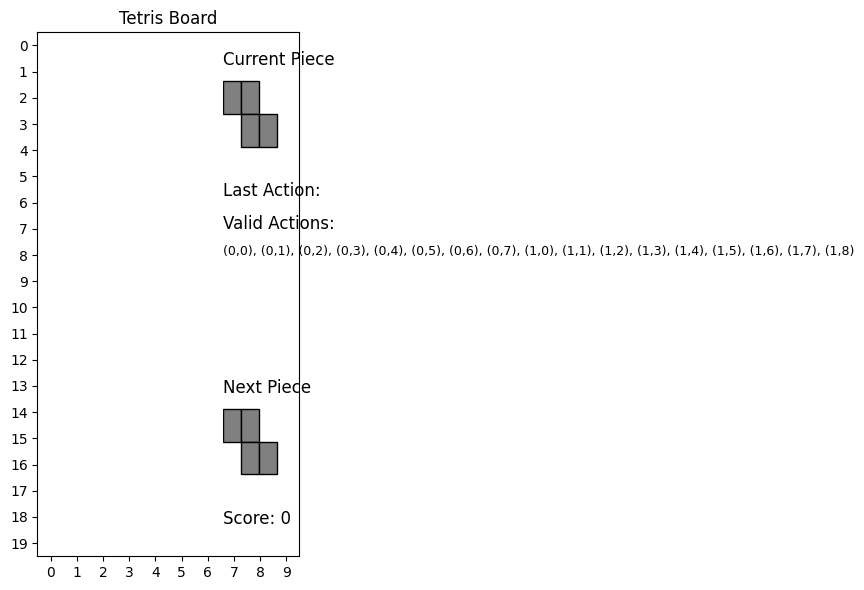

In [54]:
gym.render()

In [55]:
gym.get_valid_action_ids()

[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [56]:
"""
Rought draft of a Q-table learning
"""

env = TetrisGym.TetrisGym(max_steps=100)
epsilon = np.inf
Q   = defaultdict(lambda: np.zeros(env.get_action_space_size()))

for episode in range(1):
    state = env.reset()
    done  = False

    while not done:
        valid_ids = env.get_valid_action_ids()
        print(valid_ids)
        if np.random.rand() < epsilon:  # epsilon‑greedy over ONLY legal actions
            action_id = np.random.choice(valid_ids)
        else:
            q_vals    = Q[state][valid_ids]         # mask
            action_id = valid_ids[np.argmax(q_vals)]

        action_id = valid_ids[0]

        next_state, reward, done, _ = env.step(action_id)

        # Q‑update
        # best_next = np.max(Q[next_state]) if not done else 0
        # Q[state][action_id] += alpha * (reward + gamma * best_next - Q[state][action_id])

        state = next_state


[0, 1, 2, 3, 4, 5, 6, 17, 35]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34]


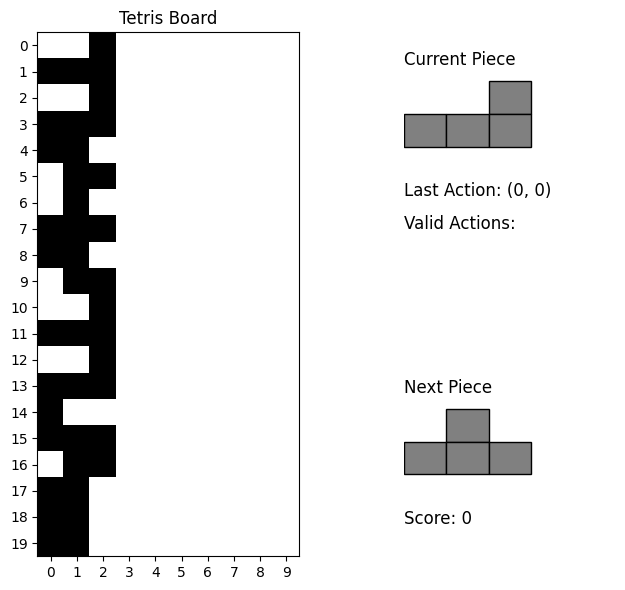

In [57]:
env.game.render(valid_actions=[])

In [58]:
gym = TetrisGym.TetrisGym(state_mode='tensor')
gym.get_state()[6]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
gym.game.current_piece

('T',
 [array([[0, 1, 0],
         [1, 1, 1]]),
  array([[1, 0],
         [1, 1],
         [1, 0]]),
  array([[1, 1, 1],
         [0, 1, 0]]),
  array([[0, 1],
         [1, 1],
         [0, 1]])])

## Tabular Q-learning

To do tabular Q-learning, we will have to maintain a Q-value for each state-action pair. But a standard Tetris Board has 10x20 rows, which amounts to **2^200** board configurations, even if not all of them are possible, it's still a lot. So we first go ahead and try out a smaller board.

In [4]:
import random
from collections import defaultdict, deque
import pickle

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from TetrisGym import TetrisGym

### Training (Start Fresh)

In [ ]:
"""Q-learning parameters"""
alpha = 0.01  # learning rate
gamma = 0.95  # discount factor

epsilon = 1.0  # exploration rate (starting value)
epsilon_min = 0.01  # minimum epsilon
epsilon_decay = 0.99995

num_episodes = 100_000 #1_000_000
max_steps_per_episode = 100

In [6]:
"""Start fresh"""
env = TetrisGym(width=6, height=6, state_mode='flat')  # Initialize the environment
# Q-table: maps from stringified state to array of Q-values (one per action)
Q = defaultdict(lambda: np.zeros(env.get_action_space_size()))

In [7]:
def stringify_state(state_tensor):
    """Convert tensor state to a hashable key (string)"""
    return state_tensor.numpy().tobytes()

def select_action(state, valid_action_ids, epsilon):
    """epsilon-greedy policy picking"""
    if random.random() < epsilon:
        return random.choice(valid_action_ids)
    else:
        state_key = stringify_state(state)
        q_values = Q[state_key]
        best_q = -float('inf')
        best_action = None
        for a in valid_action_ids:  # loop to find best action
            if q_values[a] > best_q:
                best_q = q_values[a]
                best_action = a
        return best_action


In [8]:
episode_rewards = []  # keep track of performance of each episode
episode_score = []  # keep track of score of each episode, score != reward
rolling_window_size = 1000
rolling_window = deque(maxlen=rolling_window_size)  # keep track of rolling reward, for rolling summary statistics
rolling_sum = 0
# num_episodes = 1_500 # testing the code

progress_bar = tqdm(range(num_episodes))  # use tqdm to track and update progress
for ep in progress_bar:
    state = env.reset()
    state_key = stringify_state(state)
    total_reward = 0

    for step in range(max_steps_per_episode):
        valid_actions = env.get_valid_action_ids()
        if not valid_actions:
            break
        action = select_action(state, valid_actions, epsilon)

        next_state, reward, done, _ = env.step(action)
        next_state_key = stringify_state(next_state)
        total_reward += reward

        # Bellman update
        best_next_q = max(Q[next_state_key][a] for a in env.get_valid_action_ids()) if not done else 0
        Q[state_key][action] += alpha * (reward + gamma * best_next_q - Q[state_key][action])

        if done:  # game over or exceeds max step
            break

        state = next_state
        state_key = next_state_key

    episode_rewards.append(total_reward)
    episode_score.append(env.game.score)

    if epsilon > epsilon_min:  # Decay epsilon, after each episode
        epsilon *= epsilon_decay

    # Progress update
    if len(rolling_window) == rolling_window_size:
        rolling_sum -= rolling_window[0]
    rolling_window.append(total_reward)
    rolling_sum += total_reward
    avg_rolling_reward = rolling_sum / len(rolling_window)
    progress_bar.set_description(
        f'Training agent | rolling reward: {round(avg_rolling_reward,2)} | epsilon: {round(epsilon,2)}'
        )


Training agent | rolling reward: 0.85 | epsilon: 1.0:   0%|          | 0/100000 [00:00<?, ?it/s]

Training agent | rolling reward: 1.14 | epsilon: 0.1: 100%|██████████| 100000/100000 [04:17<00:00, 388.54it/s]


In [ ]:
save_data = {
    "Q_table": dict(Q),  # convert defaultdict to dict for safety
    "episode_rewards": episode_rewards,
    "episode_score": episode_score
}

with open("tabular_qlearning_results.pkl", "wb") as f:
    pickle.dump(save_data, f)

### Training (Start from agent)

In [15]:
"""Q-learning parameters"""
alpha = 0.2  # learning rate
gamma = 0.9  # discount factor

epsilon = 0.1  # exploration rate (starting value, lower since it's already trained)
epsilon_min = 0.01  # minimum epsilon
epsilon_decay = 0.99999

num_episodes = 500_000 #1_000_000
max_steps_per_episode = 500

In [16]:
"""Start from existing trained Q-table (make sure you already have a trained Q-table as pickle!)"""
env = TetrisGym(width=6, height=6, state_mode='flat')  # Initialize the environment

# load both trained Q-table and the reward history
with open("tabular_qlearning_results.pkl", "rb") as f:
    data = pickle.load(f)
Q_table = data["Q_table"]
Q = defaultdict(lambda: np.zeros(env.get_action_space_size()), Q_table)  # defaultdict for agent access
episode_rewards = data["episode_rewards"] 

In [17]:
episode_rewards = []  # keep track of performance of each episode
rolling_window_size = 1000
rolling_window = deque(maxlen=rolling_window_size)  # keep track of rolling reward, for rolling summary statistics
rolling_sum = 0

progress_bar = tqdm(range(num_episodes))  # use tqdm to track and update progress
for ep in progress_bar:
    state = env.reset()
    state_key = stringify_state(state)
    total_reward = 0

    for step in range(max_steps_per_episode):
        valid_actions = env.get_valid_action_ids()
        if not valid_actions:
            break
        action = select_action(state, valid_actions, epsilon)

        next_state, reward, done, _ = env.step(action)
        next_state_key = stringify_state(next_state)
        total_reward += reward

        # Bellman update
        best_next_q = max(Q[next_state_key][a] for a in env.get_valid_action_ids()) if not done else 0
        Q[state_key][action] += alpha * (reward + gamma * best_next_q - Q[state_key][action])

        if done:  # game over or exceeds max step
            break

        state = next_state
        state_key = next_state_key

    episode_rewards.append(total_reward)

    if epsilon > epsilon_min:  # Decay epsilon, after each episode
        epsilon *= epsilon_decay

    # Progress update
    if len(rolling_window) == rolling_window_size:
        rolling_sum -= rolling_window[0]
    rolling_window.append(total_reward)
    rolling_sum += total_reward
    avg_rolling_reward = rolling_sum / len(rolling_window)
    progress_bar.set_description(
        f'Training agent | rolling reward: {round(avg_rolling_reward,2)} | epsilon: {round(epsilon,2)}'
        )


Training agent | rolling reward: 4.23 | epsilon: 0.01: 100%|██████████| 500000/500000 [23:21<00:00, 356.86it/s]


In [23]:
save_data = {
    "Q_table": dict(Q),  # convert defaultdict to dict for safety
    "episode_rewards": episode_rewards,
    "episode_score": episode_score
}

with open("tabular_qlearning_results.pkl", "wb") as f:
    pickle.dump(save_data, f)

### Analysis

In [24]:
with open("tabular_qlearning_results.pkl", "rb") as f:
    data = pickle.load(f)

Q_table = data["Q_table"]
episode_rewards = data["episode_rewards"]
episode_score = data['episode_score']

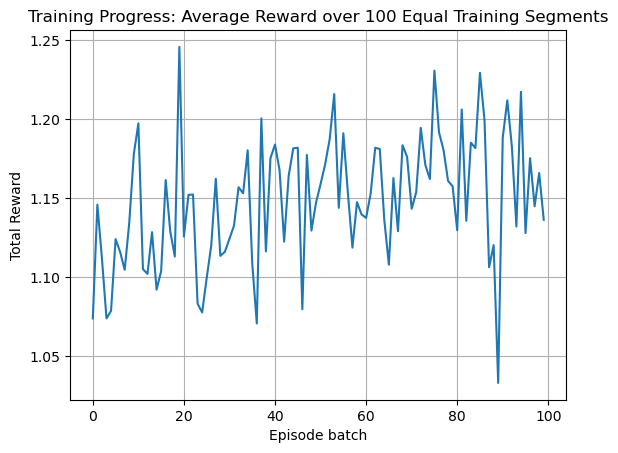

In [13]:
plt.plot(np.mean(np.array_split(episode_rewards, 100),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

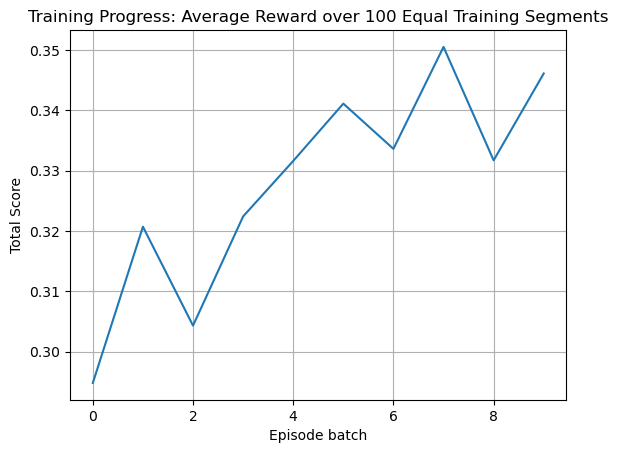

In [ ]:
plt.plot(np.mean(np.array_split(episode_score, 100),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Score')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [15]:
def evaluate_trained_policy(env, Q, num_episodes=1000):
    """Evaluate the policy with no exploration"""
    rewards = []
    for _ in tqdm(range(num_episodes), desc='Evaluating trained policy'):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            state_key = state.numpy().tobytes()
            valid_actions = env.get_valid_action_ids()
            if not valid_actions:
                break
            best_action = max(valid_actions, key=lambda a: Q[state_key][a])  # find action based on valid action and state
            state, reward, done, _ = env.step(best_action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

def evaluate_random_policy(env, num_episodes=1000):
    """A random agent for benchmark"""
    rewards = []
    for _ in tqdm(range(num_episodes), desc='Evaluating random policy'):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            valid_actions = env.get_valid_action_ids()
            if not valid_actions:
                break
            action = random.choice(valid_actions)
            state, reward, done, _ = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

In [16]:
env_trained = TetrisGym(width=6, height=6, state_mode='flat')
trained_Q = defaultdict(lambda: np.zeros(env_trained.get_action_space_size()), Q_table)  # defaultdict for agent access
greedy_rewards = evaluate_trained_policy(env_trained, trained_Q)

env_random = TetrisGym(width=6, height=6, state_mode='flat')
random_rewards = evaluate_random_policy(env_random)

NameError: name 'Q_table' is not defined

In [14]:
def summarize_stats(name, rewards):
    rewards = np.array(rewards)
    print(f"{name} Agent:")
    print(f"  Mean reward:     {rewards.mean():.2f}")
    print(f"  Std deviation:   {rewards.std():.2f}")
    print(f"  Max reward:      {rewards.max()}")
    print(f"  Min reward:      {rewards.min()}")
    print()

summarize_stats("Greedy", greedy_rewards)
summarize_stats("Random", random_rewards)


NameError: name 'greedy_rewards' is not defined

In [13]:
"""Generates a gif of AI playing, also logs unvisted state"""

unexplored_states = set()
env_capture = TetrisGym(width=6, height=6, state_mode='flat', render_mode='capture')
trained_Q = defaultdict(lambda: np.zeros(env_capture.get_action_space_size()), Q_table)  # defaultdict for agent access
state_capture = env_capture.reset()
done = False
total_reward = 0
while not done:
    state_key = state_capture.numpy().tobytes()
    if state_key not in Q_table:
            unexplored_states.add(state_key)
    valid_actions = env_capture.get_valid_action_ids()
    if not valid_actions:
        break
    best_action = max(valid_actions, key=lambda a: trained_Q[state_key][a])  # find action based on valid action and state
    state_capture, reward, done, _ = env_capture.step(best_action)
    total_reward += reward
print("Total reward:", total_reward)
env_capture.save_gif("tetris_greedy.gif", fps=2)

Total reward: 5.0
GIF saved to tetris_greedy.gif


In [14]:
unexplored_states

set()

## Placeholder